# Data Exploration and Feature Engineering

This notebook covers the initial phase of the project: Data Understanding, Exploratory Data Analysis (EDA), and Feature Engineering. 
The goal is to transform the raw claim-level and beneficiary-level data into a provider-level dataset suitable for fraud detection modeling.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Data

In [30]:
# Define file paths
data_dir = '../data'

train_path = os.path.join(data_dir, 'Train-1542865627584.csv')
train_beneficiary_path = os.path.join(data_dir, 'Train_Beneficiarydata-1542865627584.csv')
train_inpatient_path = os.path.join(data_dir, 'Train_Inpatientdata-1542865627584.csv')
train_outpatient_path = os.path.join(data_dir, 'Train_Outpatientdata-1542865627584.csv')

# Load datasets
train_labels = pd.read_csv(train_path)
train_beneficiary = pd.read_csv(train_beneficiary_path)
train_inpatient = pd.read_csv(train_inpatient_path)
train_outpatient = pd.read_csv(train_outpatient_path)

print("Datasets loaded successfully.")

Datasets loaded successfully.


## 2. Data Understanding & Inspection

In [31]:
def inspect_dataframe(df, name):
    print(f"--- {name} ---")
    print(f"Shape: {df.shape}")
    print("\nFirst 3 rows:")
    display(df.head(3))
    print("\nInfo:")
    df.info()
    print("\nMissing Values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])
    print("\n" + "="*50 + "\n")

inspect_dataframe(train_labels, "Train Labels")
inspect_dataframe(train_beneficiary, "Beneficiary Data")
inspect_dataframe(train_inpatient, "Inpatient Data")
inspect_dataframe(train_outpatient, "Outpatient Data")

--- Train Labels ---
Shape: (5410, 2)

First 3 rows:


,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5410 entries, 0 to 5409
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Provider        5410 non-null   object
 1   PotentialFraud  5410 non-null   object
dtypes: object(2)
memory usage: 84.7+ KB

Missing Values:
Series([], dtype: int64)


--- Beneficiary Data ---
Shape: (138556, 25)

First 3 rows:


,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCo

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 n

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517737 entries, 0 to 517736
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   BeneID                  517737 non-null  object 
 1   ClaimID                 517737 non-null  object 
 2   ClaimStartDt            517737 non-null  object 
 3   ClaimEndDt              517737 non-null  object 
 4   Provider                517737 non-null  object 
 5   InscClaimAmtReimbursed  517737 non-null  int64  
 6   AttendingPhysician      516341 non-null  object 
 7   OperatingPhysician      90617 non-null   object 
 8   OtherPhysician          195046 non-null  object 
 9   ClmDiagnosisCode_1      507284 non-null  object 
 10  ClmDiagnosisCode_2      322357 non-null  object 
 11  ClmDiagnosisCode_3      203257 non-null  object 
 12  ClmDiagnosisCode_4      125596 non-null  object 
 13  ClmDiagnosisCode_5      74344 non-null   object 
 14  ClmDiagnosisC

In [32]:
# Check unique identifiers
print(f"Unique Providers in Labels: {train_labels['Provider'].nunique()}")
print(f"Unique Beneficiaries: {train_beneficiary['BeneID'].nunique()}")
print(f"Unique Inpatient Claims: {train_inpatient['ClaimID'].nunique()}")
print(f"Unique Outpatient Claims: {train_outpatient['ClaimID'].nunique()}")

Unique Providers in Labels: 5410
Unique Beneficiaries: 138556
Unique Inpatient Claims: 40474
Unique Outpatient Claims: 517737


## 3. Exploratory Data Analysis (EDA)

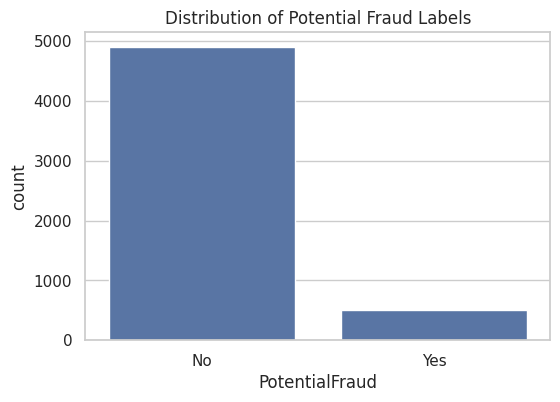

PotentialFraud
No     4904
Yes     506
Name: count, dtype: int64
Fraud Percentage: 9.35%


In [33]:
# Target Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='PotentialFraud', data=train_labels)
plt.title('Distribution of Potential Fraud Labels')
plt.show()

fraud_counts = train_labels['PotentialFraud'].value_counts()
print(fraud_counts)
print(f"Fraud Percentage: {fraud_counts['Yes'] / len(train_labels) * 100:.2f}%")

### Merging Data for Analysis
To analyze provider behavior, we need to link claims to providers and their fraud labels.

In [34]:
# Add a flag to distinguish inpatient vs outpatient before merging
train_inpatient['ClaimType'] = 'Inpatient'
train_outpatient['ClaimType'] = 'Outpatient'

# Combine Inpatient and Outpatient claims
all_claims = pd.concat([train_inpatient, train_outpatient], axis=0, sort=False)

# Merge with Labels
claims_with_labels = pd.merge(all_claims, train_labels, on='Provider', how='left')

# Merge with Beneficiary Data
full_data = pd.merge(claims_with_labels, train_beneficiary, on='BeneID', how='left')

print(f"Full Combined Data Shape: {full_data.shape}")

Full Combined Data Shape: (558211, 56)


### Financial Analysis

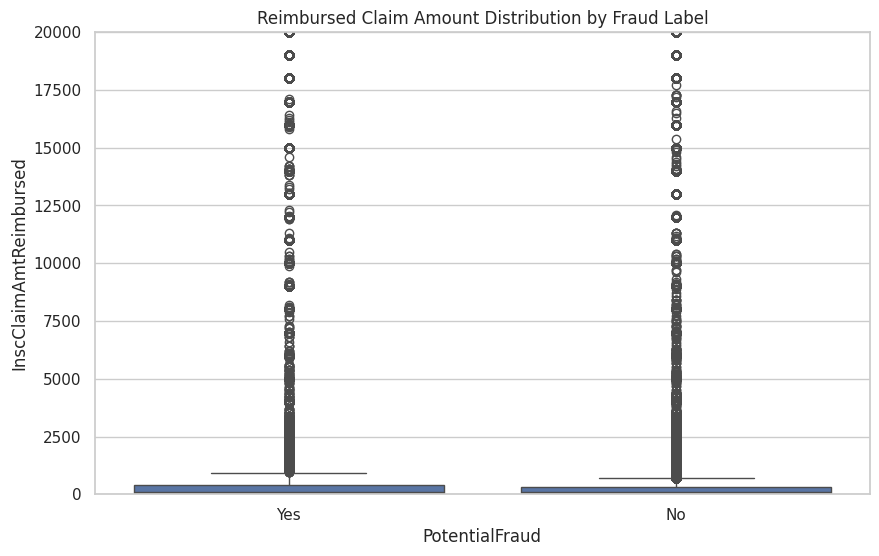

Average Reimbursement Amount:
PotentialFraud
No      755.213352
Yes    1389.505066
Name: InscClaimAmtReimbursed, dtype: float64


In [35]:
# Compare Claim Amounts: Fraud vs Non-Fraud
plt.figure(figsize=(10, 6))
sns.boxplot(x='PotentialFraud', y='InscClaimAmtReimbursed', data=full_data)
plt.title('Reimbursed Claim Amount Distribution by Fraud Label')
plt.ylim(0, 20000) # Limiting y-axis to see the box better
plt.show()

print("Average Reimbursement Amount:")
print(full_data.groupby('PotentialFraud')['InscClaimAmtReimbursed'].mean())